# Bank Loan Approval using Different Machine Learning Models

Lab 1 Data preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

In [3]:
!pip install scikit-learn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
bank_df = pd.read_csv("UniversalBank.csv")

In [7]:
bank_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [8]:
bank_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [9]:
bank_df.tail(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.000000,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.900000,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.500000,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.666667,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.000000,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.900000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.400000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.300000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.500000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.800000,1,0,0,0,0,1,1


In [10]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [11]:
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
bank_df['Experience'].value_counts()

Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: count, dtype: int64

In [13]:
negative_experience = bank_df[bank_df['Experience'] < 0]
negative_experience.shape

(52, 14)

In [14]:

#bank_df['Experience']= bank_df[(bank_df['Experience']<0)] = 0
bank_df['Experience'] = bank_df['Experience'].where(bank_df['Experience'] >= 0, 0)

In [15]:
bank_df.shape

(5000, 14)

In [16]:
bank_df['Experience'].value_counts()

Experience
32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
16    127
14    127
30    126
17    125
27    125
34    125
22    124
29    124
7     121
6     119
8     119
15    119
10    118
0     118
33    117
13    117
11    116
37    116
36    114
4     113
21    113
31    104
12    102
38     88
2      85
39     85
1      74
40     57
41     43
42      8
43      3
Name: count, dtype: int64

In [17]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [18]:
# class count
class_count_0, class_count_1 = bank_df['Personal Loan'].value_counts()

# divie class
class_0 = bank_df[bank_df['Personal Loan'] == 0]
class_1 = bank_df[bank_df['Personal Loan'] == 1]

In [19]:
# print the shape of the class
print('class 0:', class_0.shape)
print('\nclass 1:', class_1.shape)

class 0: (4520, 14)

class 1: (480, 14)


In [20]:
bank_df['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

Lab 2: Data Preparation and Data Visualization

In [21]:
from tensorflow.keras.utils import to_categorical

X = bank_df.drop(columns=["Personal Loan"])
#X = X.drop(columns=["ID"])
y = bank_df["Personal Loan"]

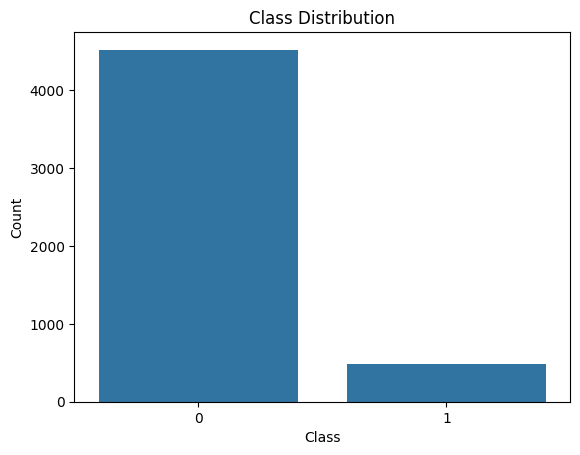

In [22]:
# Plot using seaborn countplot
sns.countplot(x=y)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [23]:
y.shape

(5000,)

Data Preparation

In [ ]:
from tensorflow.keras.utils import to_categorical

X = bank_df.drop(columns=["Personal Loan"])
y = bank_df["Personal Loan"]

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X , y = smote.fit_resample(X, y)

#y = to_categorical(y)
y.dtype

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
import seaborn as sns
sns.countplot(x=y)
plt.show()

In [ ]:
#y_labels = np.argmax(y, axis=1)

import seaborn as sns
sns.countplot(x=y,color='red')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(x=X['Age'])
plt.show()

In [ ]:
sns.countplot(x=X["Education"], color='green')
plt.show()

In [ ]:
X.info()

In [ ]:
bank_df.info()

In [ ]:
X.describe().transpose()

In [ ]:
X.isnull().sum()

In [ ]:
plt.figure(figsize=(10,8))
sns.displot(X["Income"], color='purple')
plt.savefig('income.png', facecolor='w', bbox_inches='tight')
plt.show()

In [ ]:
# lets look at the distribution of the mortgage
plt.figure(figsize=(10,8))
sns.displot(X["Mortgage"],  color='purple')
plt.savefig('mort.png', facecolor='w', bbox_inches='tight')
plt.show()

In [ ]:
cm = X.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True)
plt.savefig('heatmap.png', facecolor='w', bbox_inches='tight')
plt.show()

## Lab 3 Model Development and Training

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train


# Building a MLP Model

In [ ]:
#MLP here
from sklearn.neural_network import MLPClassifier

cl = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=100,
    activation = 'tanh',
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)

In [ ]:
cl.fit(X_train, y_train)

In [ ]:
y_predcl = cl.predict(X_test)

In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predcl)))

In [ ]:
print(classification_report(y_test, y_predcl))

In [ ]:

plt.plot(cl.loss_curve_,'o-')
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


In [ ]:
cl.fit(X_test,y_test)
plt.plot(cl.loss_curve_)
plt.title(" Test Loss Curve", fontsize=12)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


# Building Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
model.summary()

In [ ]:
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = model.predict(X_test).reshape(-1)
y_pred = (y_pred_prob > 0.5).astype(int)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy on test data: {accuracy}')


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
knnmodel = KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(X_train, y_train)


In [ ]:
y_pred = knnmodel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

In [ ]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knnmodel.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
class_labels = [str(label) for label in knnmodel.classes_]

report = classification_report(y_test, y_pred, target_names=class_labels)
print('Classification Report:')
print(report)


In [ ]:
import matplotlib.pyplot as plt
algorithms = ['MLP', 'KNN']
accs = [0.97,0.95]
plt.ylim(0.7,1.0 )
plt.title('Accuracy comparision')
plt.bar(algorithms, accs, color = 'green')

plt.show()

# SVM Model

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
svmodel = svm.SVC(kernel='rbf', C=80)

In [ ]:
svmodel.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_predsvm = svmodel.predict(X_train)
mse = mean_squared_error(y_train, train_predsvm)
rmse = sqrt(mse)
rmse

In [ ]:
test_predsvm = svmodel.predict(X_test)
accuracy = accuracy_score(y_test, test_predsvm)
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
from sklearn.metrics import classification_report
class_labels = [str(label) for label in svmodel.classes_]

report = classification_report(y_test, test_predsvm, target_names=class_labels)
print('Classification Report:')
print(report)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 1
ind = np.arange(N)
width = 0.10

xvals = [97]
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = [95]
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = [92]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xlabel("Algorithms")
plt.ylabel('Metrics')
plt.title("Algorithm COmparison")

plt.xticks(ind+width,['Accuracy'])
plt.legend( (bar1, bar2, bar3), ('MLP', 'KNN', 'RF'))
plt.show()
